In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d azathoth42/myanimelist

In [ ]:
! unzip myanimelist.zip

In [ ]:
!rm myanimelist.zip

In [2]:
import os
os.chdir('/content/drive/My Drive/aniReco/Dataset')

In [3]:
!ls

anime_cleaned.csv	animelists_filtered.csv        UserAnimeList.csv
anime_filtered.csv	final_cleaned_model_ready.csv  UserList.csv
AnimeList.csv		name_id_mapping.pickle	       users_cleaned.csv
animelists_cleaned.csv	output_dataset		       users_filtered.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Anime EDA

In [5]:
anime_df = pd.read_csv('anime_cleaned.csv')
anime_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


In [6]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   title_english    3438 non-null   object 
 3   title_japanese   6663 non-null   object 
 4   title_synonyms   4481 non-null   object 
 5   image_url        6666 non-null   object 
 6   type             6668 non-null   object 
 7   source           6668 non-null   object 
 8   episodes         6668 non-null   int64  
 9   status           6668 non-null   object 
 10  airing           6668 non-null   bool   
 11  aired_string     6668 non-null   object 
 12  aired            6668 non-null   object 
 13  duration         6668 non-null   object 
 14  rating           6668 non-null   object 
 15  score            6668 non-null   float64
 16  scored_by        6668 non-null   int64  
 17  rank          

In [7]:
anime_df.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668.000000,6668.000000,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
mean,15064.977804,14.276395,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,13161.364001,40.906929,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,2592.000000,1.000000,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,10401.500000,6.000000,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,30301.250000,13.000000,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000
max,37896.000000,1818.000000,9.520000,1.009477e+06,12856.000000,14468.000000,1.456378e+06,106895.000000,163.000000,2018.000000


In [8]:
anime_df.isna().sum()

anime_id              0
title                 0
title_english      3230
title_japanese        5
title_synonyms     2187
image_url             2
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank                356
popularity            0
members               0
favorites             0
background         5855
premiered          3702
broadcast          3688
related               0
producer           2266
licensor           3881
studio                0
genre                 4
opening_theme         0
ending_theme          0
duration_min          0
aired_from_year       0
dtype: int64

In [9]:
for col in anime_df.columns:
    print("col-name: ", col, " | no_of_unique_values: ", anime_df[col].nunique(dropna=True))

col-name:  anime_id  | no_of_unique_values:  6668
col-name:  title  | no_of_unique_values:  6668
col-name:  title_english  | no_of_unique_values:  3372
col-name:  title_japanese  | no_of_unique_values:  6310
col-name:  title_synonyms  | no_of_unique_values:  4427
col-name:  image_url  | no_of_unique_values:  6666
col-name:  type  | no_of_unique_values:  6
col-name:  source  | no_of_unique_values:  15
col-name:  episodes  | no_of_unique_values:  161
col-name:  status  | no_of_unique_values:  2
col-name:  airing  | no_of_unique_values:  2
col-name:  aired_string  | no_of_unique_values:  5297
col-name:  aired  | no_of_unique_values:  5231
col-name:  duration  | no_of_unique_values:  251
col-name:  rating  | no_of_unique_values:  7
col-name:  score  | no_of_unique_values:  509
col-name:  scored_by  | no_of_unique_values:  5035
col-name:  rank  | no_of_unique_values:  5434
col-name:  popularity  | no_of_unique_values:  5857
col-name:  members  | no_of_unique_values:  5861
col-name:  favorit

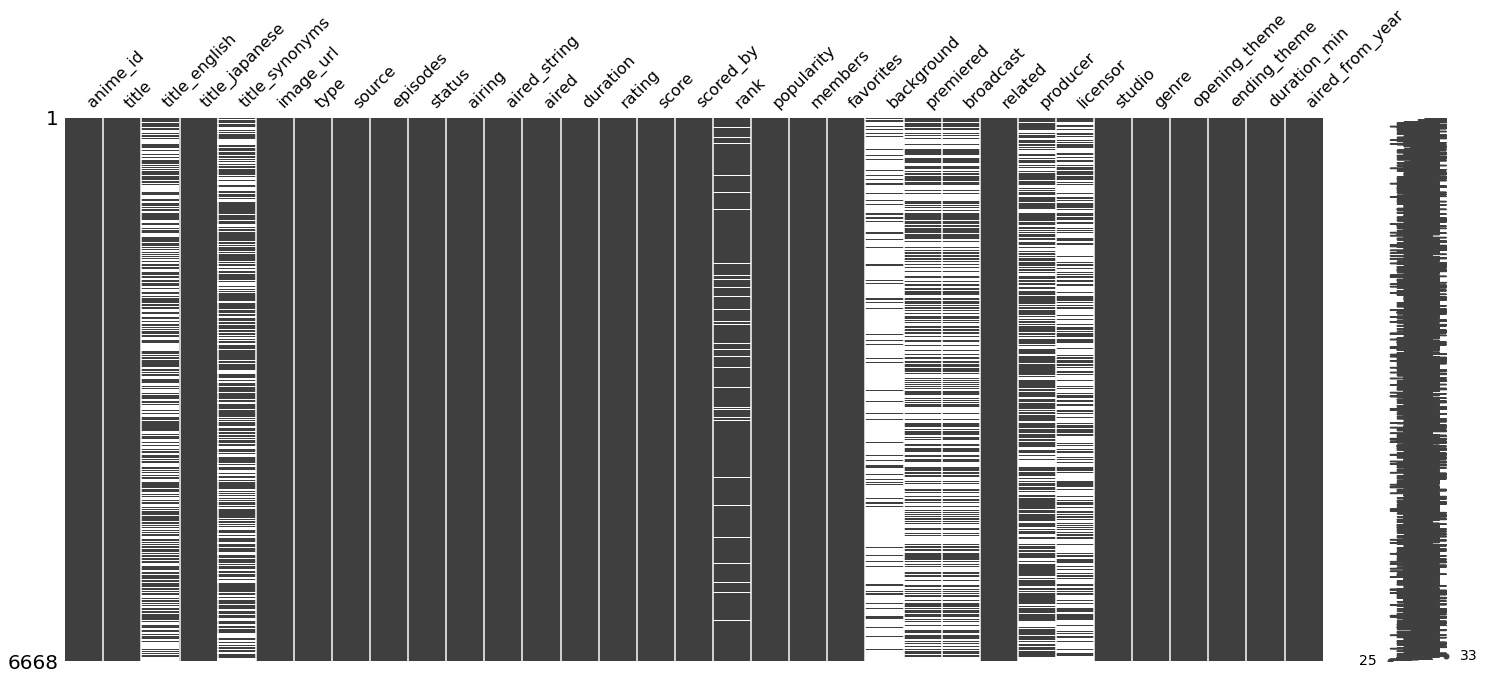

In [10]:
import missingno as msno
msno.matrix(anime_df)

Dropping unwanted columns - rating, background, premiered, broadcast, related, producer, licensor,
status also as it is similar to airing,
aired and aired_string also as it is equivalent to aired_from_year,
duration also as it is covered by duration_min

In [11]:
anime_df = anime_df.drop(['rating', 'status', 'aired_string', 'aired', 'duration', 'background', 'premiered', 'broadcast', 'related', 'producer', 'licensor'], axis = 1)
anime_df.head(10)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,airing,score,scored_by,rank,popularity,members,favorites,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,False,7.63,139250,1274.0,231,283882,2809,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,7.89,91206,727.0,366,204003,2579,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,False,7.55,37129,1508.0,1173,70127,802,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,False,8.21,36501,307.0,916,93312,3344,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,False,8.67,107767,50.0,426,182765,2082,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0
5,6586,Yume-iro Pâtissière,NaN,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,False,8.03,21618,526.0,1630,45625,826,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",24.0,2009.0
6,178,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,7.26,9663,2594.0,2490,22778,122,Production Reed,"Magic, Comedy, Romance, School, Shoujo","['""Kagami no Naka"" by can/goo']","['""Hitotsu=Unmei Kyoudoutai"" by can/goo']",24.0,2003.0
7,2787,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,24,False,7.72,126085,1066.0,332,220591,1075,J.C.Staff,"Action, Drama, Fantasy, Romance, School, Super...","['#1: ""JOINT"" by Mami Kawada (eps 1-15)', '#2:...","['#1: ""Triangle"" by Kawada Mami (eps 1-15)', '...",24.0,2007.0
8,4477,Nodame Cantabile: Paris-hen,NaN,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,11,False,8.24,53908,281.0,988,85660,282,J.C.Staff,"Music, Slice of Life, Comedy, Romance, Josei","['""Sky High!"" by The Gospellers']","['""東京 et 巴里 (Tokyo and Paris)"" by Emiri Miyamo...",23.0,2008.0
9,853,Ouran Koukou Host Club,Ouran High School Host Club,桜蘭高校ホスト部,"Ohran Koko Host Club, Ouran Koukou Hosutobu, O...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,8.34,335137,205.0,69,538843,24072,Bones,"Comedy, Harem, Romance, School, Shoujo","['""Sakura Kiss"" by Chieko Kawabe']","['""Shissou"" by Last Alliance']",23.0,2006.0


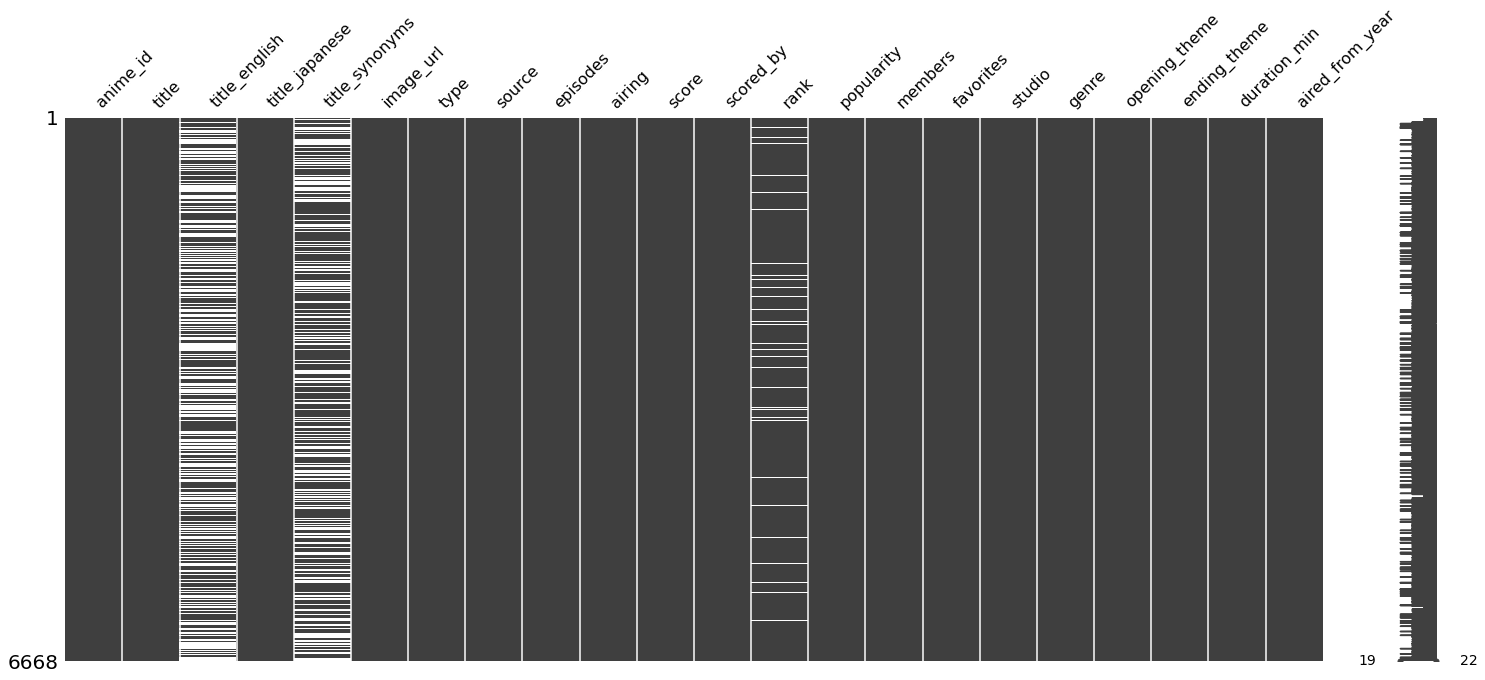

In [12]:
msno.matrix(anime_df)

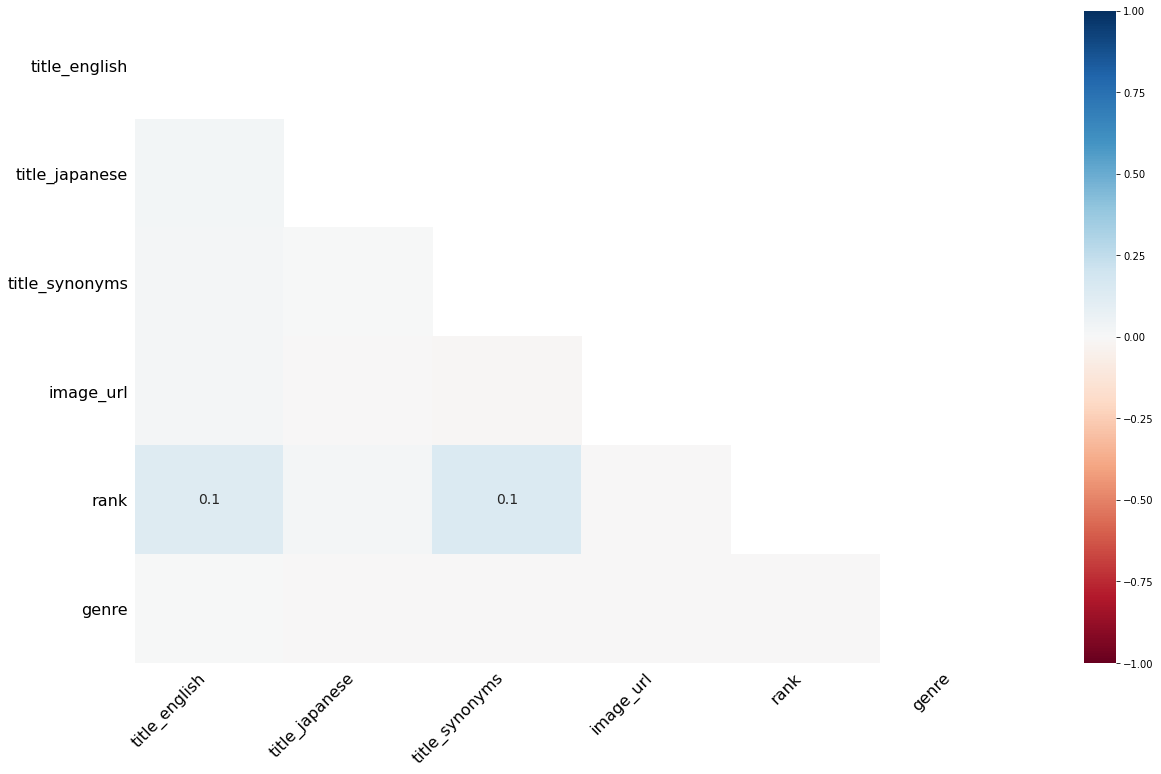

In [13]:
msno.heatmap(anime_df)

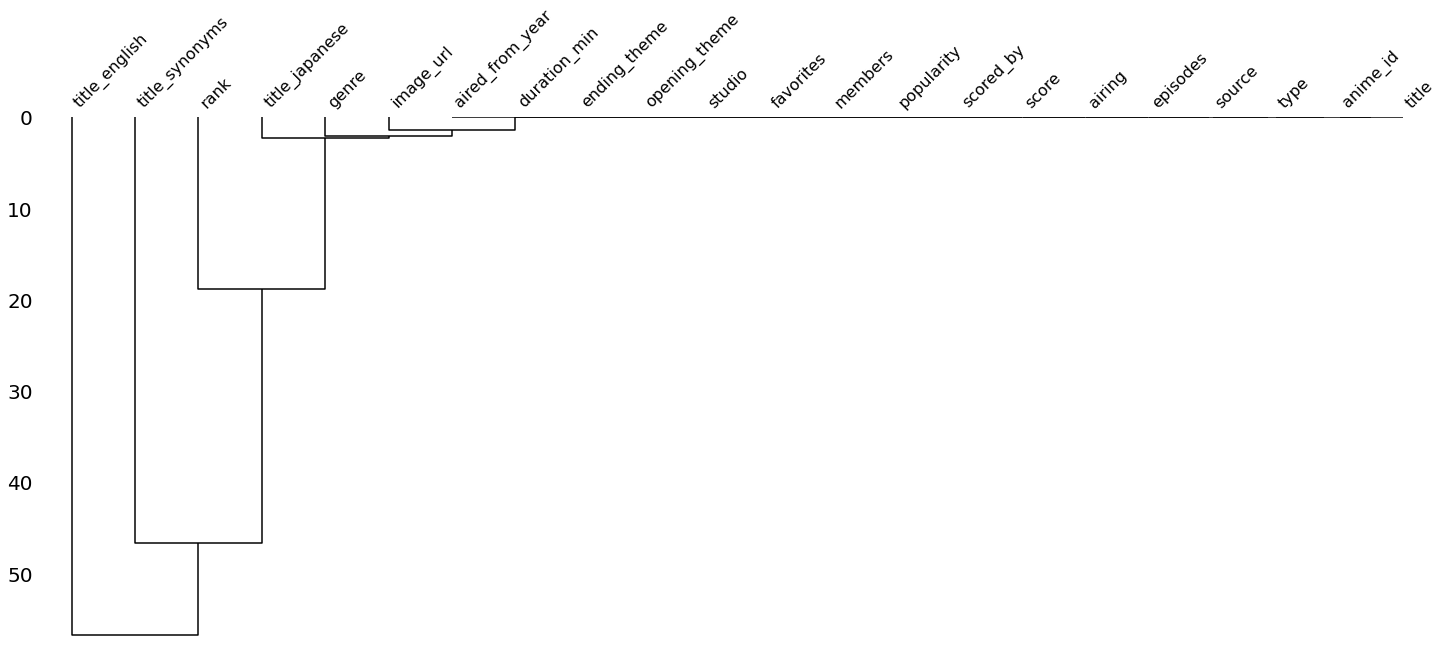

In [14]:
msno.dendrogram(anime_df)

In [15]:
for col in anime_df.columns:
    print("col-name: ", col, " | no_of_unique_values: ", anime_df[col].nunique(dropna=True))

col-name:  anime_id  | no_of_unique_values:  6668
col-name:  title  | no_of_unique_values:  6668
col-name:  title_english  | no_of_unique_values:  3372
col-name:  title_japanese  | no_of_unique_values:  6310
col-name:  title_synonyms  | no_of_unique_values:  4427
col-name:  image_url  | no_of_unique_values:  6666
col-name:  type  | no_of_unique_values:  6
col-name:  source  | no_of_unique_values:  15
col-name:  episodes  | no_of_unique_values:  161
col-name:  airing  | no_of_unique_values:  2
col-name:  score  | no_of_unique_values:  509
col-name:  scored_by  | no_of_unique_values:  5035
col-name:  rank  | no_of_unique_values:  5434
col-name:  popularity  | no_of_unique_values:  5857
col-name:  members  | no_of_unique_values:  5861
col-name:  favorites  | no_of_unique_values:  1225
col-name:  studio  | no_of_unique_values:  711
col-name:  genre  | no_of_unique_values:  3203
col-name:  opening_theme  | no_of_unique_values:  3448
col-name:  ending_theme  | no_of_unique_values:  4299
col-

need to do something with anime titles....

In [16]:
anime_df['other_title'] = anime_df['title_english'].str.cat(anime_df['title_synonyms'],sep=",")
anime_df = anime_df.drop(['title_english', 'title_synonyms'], axis=1)
anime_df.head(10)

,anime_id,title,title_japanese,image_url,type,source,episodes,airing,score,scored_by,rank,popularity,members,favorites,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,other_title
0,11013,Inu x Boku SS,妖狐×僕SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,False,7.63,139250,1274.0,231,283882,2809,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0,"Inu X Boku Secret Service,Youko x Boku SS"
1,2104,Seto no Hanayome,瀬戸の花嫁,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,7.89,91206,727.0,366,204003,2579,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0,"My Bride is a Mermaid,The Inland Sea Bride"
2,5262,Shugo Chara!! Doki,しゅごキャラ！！どきっ,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,False,7.55,37129,1508.0,1173,70127,802,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0,"Shugo Chara!! Doki,Shugo Chara Ninenme, Shugo ..."
3,721,Princess Tutu,プリンセスチュチュ,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,False,8.21,36501,307.0,916,93312,3344,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0,NaN
4,12365,Bakuman. 3rd Season,バクマン。,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,False,8.67,107767,50.0,426,182765,2082,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0,"Bakuman.,Bakuman Season 3"
5,6586,Yume-iro Pâtissière,夢色パティシエール,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,False,8.03,21618,526.0,1630,45625,826,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",24.0,2009.0,NaN
6,178,Ultra Maniac,ウルトラマニアック,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,7.26,9663,2594.0,2490,22778,122,Production Reed,"Magic, Comedy, Romance, School, Shoujo","['""Kagami no Naka"" by can/goo']","['""Hitotsu=Unmei Kyoudoutai"" by can/goo']",24.0,2003.0,NaN
7,2787,Shakugan no Shana II (Second),灼眼のシャナII –Second–,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,24,False,7.72,126085,1066.0,332,220591,1075,J.C.Staff,"Action, Drama, Fantasy, Romance, School, Super...","['#1: ""JOINT"" by Mami Kawada (eps 1-15)', '#2:...","['#1: ""Triangle"" by Kawada Mami (eps 1-15)', '...",24.0,2007.0,"Shakugan no Shana: Season II,Shakugan no Shana 2"
8,4477,Nodame Cantabile: Paris-hen,のだめカンタービレ 巴里編,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,11,False,8.24,53908,281.0,988,85660,282,J.C.Staff,"Music, Slice of Life, Comedy, Romance, Josei","['""Sky High!"" by The Gospellers']","['""東京 et 巴里 (Tokyo and Paris)"" by Emiri Miyamo...",23.0,2008.0,NaN
9,853,Ouran Koukou Host Club,桜蘭高校ホスト部,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,8.34,335137,205.0,69,538843,24072,Bones,"Comedy, Harem, Romance, School, Shoujo","['""Sakura Kiss"" by Chieko Kawabe']","['""Shissou"" by Last Alliance']",23.0,2006.0,"Ouran High School Host Club,Ohran Koko Host Cl..."


In [17]:
cols = anime_df.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
anime_df = anime_df[cols]
anime_df.head(10)

,anime_id,title,title_japanese,other_title,image_url,type,source,episodes,airing,score,scored_by,rank,popularity,members,favorites,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,妖狐×僕SS,"Inu X Boku Secret Service,Youko x Boku SS",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,False,7.63,139250,1274.0,231,283882,2809,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,瀬戸の花嫁,"My Bride is a Mermaid,The Inland Sea Bride",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,7.89,91206,727.0,366,204003,2579,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara!! Doki,Shugo Chara Ninenme, Shugo ...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,False,7.55,37129,1508.0,1173,70127,802,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,False,8.21,36501,307.0,916,93312,3344,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,バクマン。,"Bakuman.,Bakuman Season 3",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,False,8.67,107767,50.0,426,182765,2082,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0
5,6586,Yume-iro Pâtissière,夢色パティシエール,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,False,8.03,21618,526.0,1630,45625,826,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",24.0,2009.0
6,178,Ultra Maniac,ウルトラマニアック,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,7.26,9663,2594.0,2490,22778,122,Production Reed,"Magic, Comedy, Romance, School, Shoujo","['""Kagami no Naka"" by can/goo']","['""Hitotsu=Unmei Kyoudoutai"" by can/goo']",24.0,2003.0
7,2787,Shakugan no Shana II (Second),灼眼のシャナII –Second–,"Shakugan no Shana: Season II,Shakugan no Shana 2",https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,24,False,7.72,126085,1066.0,332,220591,1075,J.C.Staff,"Action, Drama, Fantasy, Romance, School, Super...","['#1: ""JOINT"" by Mami Kawada (eps 1-15)', '#2:...","['#1: ""Triangle"" by Kawada Mami (eps 1-15)', '...",24.0,2007.0
8,4477,Nodame Cantabile: Paris-hen,のだめカンタービレ 巴里編,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,11,False,8.24,53908,281.0,988,85660,282,J.C.Staff,"Music, Slice of Life, Comedy, Romance, Josei","['""Sky High!"" by The Gospellers']","['""東京 et 巴里 (Tokyo and Paris)"" by Emiri Miyamo...",23.0,2008.0
9,853,Ouran Koukou Host Club,桜蘭高校ホスト部,"Ouran High School Host Club,Ohran Koko Host Cl...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,False,8.34,335137,205.0,69,538843,24072,Bones,"Comedy, Harem, Romance, School, Shoujo","['""Sakura Kiss"" by Chieko Kawabe']","['""Shissou"" by Last Alliance']",23.0,2006.0


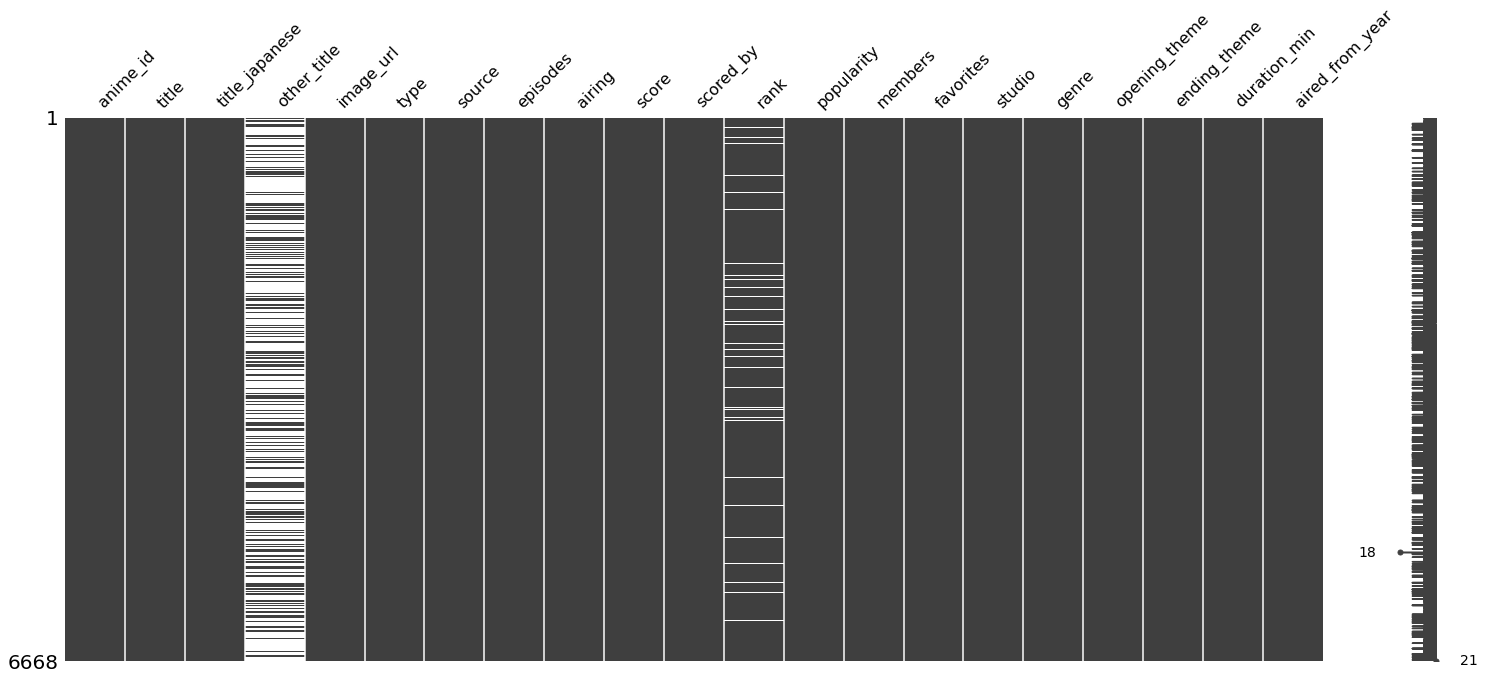

In [18]:
msno.matrix(anime_df)

## Ratings EDA

In [ ]:
ratings_df = pd.read_csv('animelists_cleaned.csv')
ratings_df.head()

## Users EDA

In [ ]:
users_df = pd.read_csv('users_cleaned.csv')
users_df.head()

In [ ]:
final_df = pd.read_csv('final_cleaned_model_ready.csv')
final_df.head()

,anime_id,type,source,episodes,status,airing,rating,score,scored_by,rank,popularity,members,favorites,studio,duration_min,aired_from_year,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Fantasy,Kids,Action,Music,SliceofLife,Josei,Harem,ShounenAi,Adventure,SuperPower,Sci-Fi,Ecchi,Seinen,MartialArts,Game,Sports,Demons,Historical,Horror,Mystery,Psychological,Vampire,Mecha,Military,Space,Samurai,Thriller,Hentai,Yaoi,ShoujoAi,Police,Cars,Dementia,Yuri,unknown,days
0,11013,5,6,12,1,0,3,7.63,139250,1274.0,231,283882,2809,139,24.0,2012.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.0
1,2104,5,6,26,1,0,3,7.89,91206,727.0,366,204003,2579,207,24.0,2007.0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182.0
2,5262,5,6,51,1,0,2,7.55,37129,1508.0,1173,70127,802,470,24.0,2008.0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,356.0
3,721,5,9,38,1,0,3,8.21,36501,307.0,916,93312,3344,225,16.0,2002.0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,280.0
4,12365,5,6,25,1,0,3,8.67,107767,50.0,426,182765,2082,250,24.0,2012.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175.0
